## 4) IMDB 리뷰 감성 분류하기(IMDB Movie Review Sentiment Analysis)

머신러닝에서 텍스트 분류. 그 중에서도 특히, 감성 분류를 연습하기 위해 자주 사용하는 데이터가 있다. 바로 영화 사이트 IMDB의 리뷰 데이터이다. 이 데이터는 리뷰에 대한 텍스트와 해당 리뷰가 긍정인 경우 1을, 부정인 경우 0으로 표시한 레이블로 구성된 데이터이다.

스탠포드 대학교에서 2011년에 낸 논문에서 이 데이터를 소개하였으며, 당시 논문에서는 이 데이터를 훈련 데이터와 테스트 데이터를 50:50 비율로 분할하여 88.89%의 정확도를 얻었다고 소개하고 있다.

논문 링크 : http://ai.stanford.edu/~amaas/papers/wvSent_acl2011.pdf

케라스에서는 해당 IMDB 영화 리뷰 데이터를 imdb.load_data() 함수를 통해 바로 다운로드 할 수 있도록 지원하고 있다. 케라스로부터 해당 데이터를 다운로드 받아 감성 분류를 수행하는 모델을 만들어보겠다.



### 1.IMDB 리뷰 데이터에 대한 이해



In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use(['seaborn-white'])
import numpy as np
from tensorflow.keras.datasets import imdb

영화 리뷰 데이터를 갖고 오겠다. 케라스에서 제공하는 IMDB 리뷰 데이터는 앞서 배운 로이터 뉴스 데이터에서 훈련 데이터와 테스트 데이터를 우리가 직접 비율을 조절했던 것과는 달리 이미 훈련 데이터와 테스트 데이터를 50:50 비율로 구분해서 제공한다. 로이터 뉴스 데이터에서 사용했던 test_split과 같은 데이터의 비율을 조절하는 파라미터는 imdb.load_data에서는 지원하지 않는다.


In [2]:
# 영화 리뷰는 X_train에, 감성 정보는 y_train에 저장된다.
# 테스트용 리뷰는 X_test에, 테스트용 리뷰의 감성 정보는 y_test에 저장된다.
(X_train, y_train), (X_test, y_test) = imdb.load_data()
# (X_train, y_train), (X_test, y_test) = imdb.load_data(num_words = 10000)

17465344/17464789 [==============================] - 0s 0us/step


<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

imdb.load_data()의 파라미터로 num_words를 사용하면 이 데이터에서 등장 빈도 순위로 몇 번째에 해당하는 단어까지를 사용할 것인지를 의미한다. 예를 들어서 10,000을 넣으면, 등장 빈도 순위가 1~10,000에 해당하는 단어만 사용하게 된다. 즉, 단어 집합의 크기는 10,000이 된다. 지금은 별도로 제한하지 않겠다.


In [3]:
print('훈련용 리뷰 개수 : {}'.format(len(X_train)))
print('테스트용 리뷰 개수 : {}'.format(len(X_test)))
num_classes = max(y_train) + 1
print('카테고리 : {}'.format(num_classes))

훈련용 리뷰 개수 : 25000
테스트용 리뷰 개수 : 25000
카테고리 : 2


훈련용 리뷰의 개수, 테스트용 리뷰의 개수, 카테고리의 수를 출력하는 코드이다.

y_train은 0부터 시작해서 레이블을 부여하므로, y_train에 들어 있는 가장 큰 수에 +1을 하여 출력하면 카테고리가 총 몇 개인지를 알 수 있다. 훈련용 리뷰는 25,000개, 테스트용 리뷰는 25,000개, 카테고리는 2개이다.



In [4]:
print(X_train[0])
print(y_train[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 22665, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 21631, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 19193, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 10311, 8, 4, 107, 117, 5952, 15, 256, 4, 31050, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 12118, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
1


훈련 데이터가 어떻게 구성되어 있는지를 확인하기 위해 첫번째 훈련용 리뷰를 출력해보았다. 다시 말해, 25,000개의 영화 리뷰 중 첫번째 리뷰 텍스트와 그 리뷰에 대한 레이블을 출력해보는 것이다.

첫번째 훈련용 리뷰(X_train[0], y_train[0])에서 리뷰 본문에 해당하는 X_train[0]에는 숫자들이 들어있다. 이 데이터는 토큰화와 정수 인코딩이라는 텍스트 전처리가 끝난 상태이다. IMDB 리뷰 데이터는 전체 데이터에서 각 단어들의 등장 빈도에 따라서 인덱스를 부여했다. 숫자가 낮을수록 이 데이터에서 등장 빈도 순위가 높다. 위에서 단어 집합의 크기를 제한하지 않았기 때문에 22,665와 같은 큰 숫자도 보인다.

첫번째 훈련용 리뷰의 레이블에 해당하는 y_train[0]의 값은 1이다. 이 값은 첫번째 훈련 데이터가 2개의 카테고리 중 1에 해당하는 카테고리임을 의미한다. 이 예제의 경우 감성 정보로서 0 또는 1의 값을 가지는데, 이 경우에는 긍정을 의미하는 1의 값을 가진다.

25,000개의 훈련용 리뷰의 각 길이는 전부 다른데, 리뷰의 길이 분포를 그래프로 시각화해보겠다.


리뷰의 최대 길이 : 2494
리뷰의 평균 길이 : 238.71364


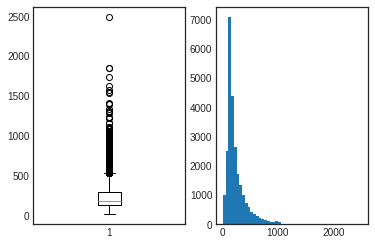

In [5]:
len_result = [len(s) for s in X_train]

print('리뷰의 최대 길이 : {}'.format(np.max(len_result)))
print('리뷰의 평균 길이 : {}'.format(np.mean(len_result)))

plt.subplot(1, 2, 1)
plt.boxplot(len_result)
plt.subplot(1, 2, 2)
plt.hist(len_result, bins = 50)
plt.show()

대체적으로 1,000이하의 길이를 가지며, 특히 100~500 길이를 가진 데이터가 많은 것을 확인할 수 있다. 반면, 가장 긴 길이를 가진 데이터는 길이가 2,000이 넘는 것도 확인할 수 있다. 레이블의 분포를 확인해보겠다.



In [6]:
unique_elements, counts_elements = np.unique(y_train, return_counts = True)

print('각 레이블에 대한 빈도수:')
print(np.asarray((unique_elements, counts_elements)))

각 레이블에 대한 빈도수:
[[    0     1]
 [12500 12500]]


25,000개의 리뷰가 존재하는데 두 레이블 0과 1은 각각 12,500개로 균등한 분포를 가지고 있다. X_train에 들어있는 숫자들이 각각 어떤 단어들을 나타내고 있는지 확인해보겠다. imdb.get_word_index()에 각 단어와 맵핑되는 정수가 저장되어져 있다. 주의할 점은 imdb.get_word_index()에 저장된 값에 +3을 해야 실제 맵핑되는 정수이다. 이것은 IMDB 리뷰 데이터셋에서 정한 규칙이다.



In [7]:
word_to_index = imdb.get_word_index()
index_to_word = {}
for key, value in word_to_index.items():
    index_to_word[value + 3] = key

1646592/1641221 [==============================] - 0s 0us/step


index_to_word에 인덱스를 집어넣으면 전처리 전에 어떤 단어였는지 확인할 수 있다. IMDB 리뷰 데이터셋에서는 0, 1, 2, 3은 특별 토큰으로 취급하고 있다. 그래서 정수 4부터가 실제 IMDB 리뷰 데이터셋에서 빈도수가 가장 높은 실제 영단어이다.


In [8]:
print('빈도수 상위 1등 단어 : {}'.format(index_to_word[4]))

빈도수 상위 1등 단어 : the


In [9]:
print('빈도수 상위 3938등 단어 : {}'.format(index_to_word[3941]))

빈도수 상위 3938등 단어 : suited


이 데이터에서 빈도가 가장 높은 단어는 the이고, 빈도가 3938번째로 높은 단어는 suited이다. 

In [10]:
for index, token in enumerate(("<pad>", "<sos>", "<unk>")):
    index_to_word[index] = token

print(' '.join([index_to_word[index] for index in X_train[0]]))

<sos> this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert redford's is an amazing actor and now the same being director norman's father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for retail and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also congratulations to the two little boy's that played the part's of norman and paul they were just brilliant children are often left out of the praising list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and shoul

첫번째 훈련용 리뷰의 X_train[0]이 인덱스로 바뀌기 전에 어떤 단어들이었는지 확인해보겠다.


### 2.GRU로 IMDB 리뷰 감성 분류하기

우선 필요한 패키지를 가져온다.


In [11]:
import re
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GRU, Embedding
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import load_model

단어 집합의 크기를 10,000으로 제한한다.


In [12]:
vocab_size = 10000
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words = vocab_size)

<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

최대 리뷰 길이는 500으로 제한한다.

In [13]:
max_len = 500
X_train = pad_sequences(X_train, maxlen = max_len)
X_test  = pad_sequences(X_test , maxlen = max_len)

각 리뷰는 문장의 길이가 다르기 때문에, 모델이 처리할 수 있도록 길이를 동일하게 해주어야 한다. 이때 사용하는 것이 pad_sequences()이다. 길이는 max_len에 넣는 값으로 정해진다. 훈련 데이터가 정한 길이를 초과하면 초과분을 삭제하고, 부족하면 0으로 채운다.

In [14]:
model = Sequential()
model.add(Embedding(vocab_size, 100))
model.add(GRU(128))
model.add(Dense(1, activation = 'sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 100)         1000000   
_________________________________________________________________
gru (GRU)                    (None, 128)               88320     
_________________________________________________________________
dense (Dense)                (None, 1)                 129       
Total params: 1,088,449
Trainable params: 1,088,449
Non-trainable params: 0
_________________________________________________________________


Embedding()은 두 개의 인자를 받는데, 첫번째 인자는 단어 집합의 크기이며, 두번째 인자는 임베딩 후의 벡터 크기이다. 여기서는 100을 선택했다. 즉, 입력 데이터에서 모든 단어는 100차원의 임베딩 벡터로 표현된다.

검증 데이터의 손실(loss)이 증가하면, 과적합 징후이므로 검증 데이터 손실이 4회 증가하면 학습을 중단하는 조기 종료(EarlyStopping)를 사용한다. 또한, ModelCheckpoint를 사용하여 검증 데이터의 정확도가 이전보다 좋아질 경우에만 모델을 저장하도록 한다.



In [15]:
es = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1,
                   patience = 4)
mc = ModelCheckpoint('GRU_model.h5', monitor = 'val_acc', mode = 'max',
                     verbose = 1, save_best_only = True)


이진 분류이므로 출력층은 뉴런 하나와 활성화 함수로 시그모이드 함수를 사용한다.


In [16]:
model.compile(optimizer = 'rmsprop',
              loss = 'binary_crossentropy',
              metrics = ['acc'])

In [17]:
hist = model.fit(X_train, y_train,
                 epochs = 15, 
                 callbacks = [es, mc],
                 batch_size = 60,
                 validation_split = 0.2)

Epoch 1/15
334/334 [==============================] - 273s 809ms/step - loss: 0.6257 - acc: 0.6988 - val_loss: 0.3211 - val_acc: 0.8684

Epoch 00001: val_acc improved from -inf to 0.86840, saving model to GRU_model.h5
Epoch 2/15
334/334 [==============================] - 271s 812ms/step - loss: 0.3140 - acc: 0.8789 - val_loss: 0.3204 - val_acc: 0.8662

Epoch 00002: val_acc did not improve from 0.86840
Epoch 3/15
334/334 [==============================] - 268s 804ms/step - loss: 0.2518 - acc: 0.9049 - val_loss: 0.3045 - val_acc: 0.8766

Epoch 00003: val_acc improved from 0.86840 to 0.87660, saving model to GRU_model.h5
Epoch 4/15
334/334 [==============================] - 269s 806ms/step - loss: 0.1917 - acc: 0.9298 - val_loss: 0.3153 - val_acc: 0.8680

Epoch 00004: val_acc did not improve from 0.87660
Epoch 5/15
334/334 [==============================] - 269s 804ms/step - loss: 0.1749 - acc: 0.9408 - val_loss: 0.2896 - val_acc: 0.8942

Epoch 00005: val_acc improved from 0.87660 to 0.89

긍정인지 부정인지에 대한 이진 판별값이 출력이 되기 때문에, 손실 함수는 binary_crossentropy를 사용한다. 최적화 함수는 rmsprop을 사용하였다. 또한, 에포크마다 정확도를 구하기 위해 accuracy를 추가해준다. 에포크는 총 10회를 수행하겠다.

저자의 경우, 조기 종료 조건에 따라서 에포크 9회에서 조기 종료되었다. 훈련이 다 되었다면 이제 테스트 데이터에 대해서 정확도를 평가할 차례이다. 훈련 과정에서 검증 데이터의 정확도가 가장 높았을 때 저장된 모델인 'GRU_model.h5'를 로드한다.



In [19]:
loaded_model = load_model('GRU_model.h5')
print('\n 테스트 정확도: %.4f' % (loaded_model.evaluate(X_test, y_test)[1]))


782/782 [==============================] - 8s 10ms/step - loss: 0.2984 - acc: 0.8904

 테스트 정확도: 0.8904


테스트 데이터에 대해서 정확도 88.93%를 얻는다. 임의의 문장에 대해서 리뷰의 긍정, 부정을 예측하고자 한다. 이를 위해서는 모델에 넣기 전에 임의의 문장에 대해서 전처리를 해주어야 한다.

sentiment_predict는 입력된 문장에 대해서 기본적인 전처리와 정수 인코딩, 패딩을 한 후에 모델의 입력으로 사용하여 예측값을 리턴하는 함수이다.


In [20]:
def sentiment_predict(new_sentence):
    # 알파벳과 숫자를 제외하고 모두 제거 및 알파벳 소문자화
    new_sentence = re.sub('[^0-9a-zA-Z ]', '', new_sentence).lower()

    # 정수 인코딩
    encoded = []
    for word in new_sentence.split():
        # 단어 집합의 크기를 10,000으로 제한.
        try:
            if word_to_index[word] <= 10000:
                encoded.append(word_to_index[word] + 3)
            else:
                # 10,000 이상의 숫자는 <unk> 토큰으로 취급.
                encoded.append(2)
        except KeyError:
            encoded.append(2)

    pad_new = pad_sequences([encoded], maxlen = max_len) # 패딩
    score = float(loaded_model.predict(pad_new)) # 예측
    if (score > 0.5):
        print('{:.2f}% 확률로 긍정 리뷰입니다.'.format(score * 100))
    else:
        print('{:.2f}% 확률로 부정 리뷰입니다.'.format((1 - score) * 100))

IMDB 사이트에 접속해서 영화 블랙팬서의 1점 리뷰를 가져왔다. 부정으로 제대로 예측하는지 테스트해보겠다.

In [21]:
temp_str = "This movie was just way too overrated. The fighting was not professional and in slow motion. I was expecting more from a 200 million budget movie. The little sister of T.Challa was just trying too hard to be funny. The story was really dumb as well. Don't watch this movie if you are going because others say its great unless you are a Black Panther fan or Marvels fan."

sentiment_predict(temp_str)

98.00% 확률로 부정 리뷰입니다.


IMDB 사이트에 접속해서 영화 어벤져스의 10점 리뷰를 가져왔다. 긍정으로 제대로 예측하는지 테스트해보겠다.


In [22]:
temp_str = " I was lucky enough to be included in the group to see the advanced screening in Melbourne on the 15th of April, 2012. And, firstly, I need to say a big thank-you to Disney and Marvel Studios. \
Now, the film... how can I even begin to explain how I feel about this film? It is, as the title of this review says a 'comic book triumph'. I went into the film with very, very high expectations and I was not disappointed. \
Seeing Joss Whedon's direction and envisioning of the film come to life on the big screen is perfect. The script is amazingly detailed and laced with sharp wit a humor. The special effects are literally mind-blowing and the action scenes are both hard-hitting and beautifully choreographed."

sentiment_predict(temp_str)


99.33% 확률로 긍정 리뷰입니다.
